# Project Planning Stage (Individual)

### (1) Data Description

1. Overview of the Dataset
In this project, I will be using two datasets provided by the UBC research group studying Minecraft player behaviour:
   players.csv: contains the rows for each single player, including play experience, demographic information, and whether the player subscribes to the game-related newsletter.
   sessions.csv: contains the rows for each play session, including the start time and the end time for each play session.
2. player.csv
   Number of observations: 196 players
   Number of variables: 7
   Description: A player-level dataset containing demographics, experience level, playtime information, and subscription status.
   ### Variables in players.csv

| Variable Name   | Type       | Description                                                                    |
|-----------------|------------|--------------------------------------------------------------------------------|
| experience      | Categorical| The experience in the game(Amateur, Regular, Veteran, Pro).                    |
| subscribe       | Logical    | Whether the player subscribed to the newsletter.                               |
| hashedEmail     | Feature    | unique feature                                                                 |
| played_hours    | Numeric    | just play hours                                                                |
| name            | Feature    | the avator name                                                                |
| gender          | Feature    | plaer's gender                                                                 |
| Age             | Numeric    | Player’s age                                                                   |

3. sessions.csv
   Number of observations: 1535 sessions
   Number of variables: 5
   Description: A session-level dataset, where each row corresponds to a single play session.
   ### Variables in sessions.csv

| Variable Name        | Type     | Description                                                                |
|----------------------|----------|----------------------------------------------------------------------------|
| hashedEmail          | Feature  | identify the session                                                       |
| start_time           | Feature  | session start time                                                         |
| end_time             | Feature  | session end time                                                           |
| original_start_time  | Numeric  | Unix start time                                                            |
| original_end_time    | Numeric  | Unix end time                                                              |

4. data-collect method
The data is automatically collected by the UBC research group's Minecraft research server. The player's characteristics will be recorded when they sign up, and the session-level data will be generated every time the player logs in and out of the server.

5. Potential problems and considerations
   We need to consider some potential data problems before analyzing.
   1. Time formats are different: Start_time and end_time are strings, original_start_time and original_end_time are numbers. The consistency check is required.
   2. Missing values, some players' information is missing gender and age.
   3. The imbalance of variables: True is far more than False.

6. Summary information
   In the EDA part, I'll calculate:
   1. The average of the figure variables in players.csv.
   2. Distribution of experience type
   3. Session number of each player
   4. Session duration summary
   These summaries help to confirm whether these variables can effectively predict subscription to the newsletter.

### (2) Questions

Board question:
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question:
Can we use a player's total play time, number of sessions, and activity measures to predict whether the player subscribes newsletter?

The response variable in this analysis is the variable subscribe (TRUE/FALSE) from the players.csv dataset. The explanatory variables will be drawn from both datasets.

To solve this problem, I'll connect players.csv and sessions.csv by using the shared identifier hasheedEmail. Then, I'll transfer session-level data to player-level character, such as session number, total play time, and average session time. According to performing these fundamental data, the dataset we got will be used to apply predictive modelling methods during the later stages of the project.

### (3) Exploration Data Analysis and Visualizaation

In [1]:
library(readr)
library(ggplot2)
library(dplyr)
#1）load data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
#2) tidy
names(players) <- tolower(names(players))
names(sessions) <- tolower(names(sessions))

players <- players |>
    mutate(
        subscrive = tolower(as.character(subscribe)) == "true",
        played_hours = as.numeric(played_hours),
        age = (as.numeric(age))
    )
        
sessions <- sessions |>
    mutate(
        start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
        end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
        session_minutes = as.numeric (difftime(end_time, start_time, units = "mins")),
        start_hour = as.numeric(format(start_time, "%H"))) |>
    filter(is.finite(session_minutes), session_minutes > 0, session_minutes <=720)
#3) average
numeric_cols <- sapply(players, is.numeric)
players_means <- round(colMeans(players[, numeric_cols], na.rm = TRUE), 2)
players_means_tbl <- data.frame(variable = names(players_means),
                                mean = as.numeric(players_means),
                                row.names = NULL)
players_means_tbl

variable,mean
<chr>,<dbl>
played_hours,5.85
age,21.14


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


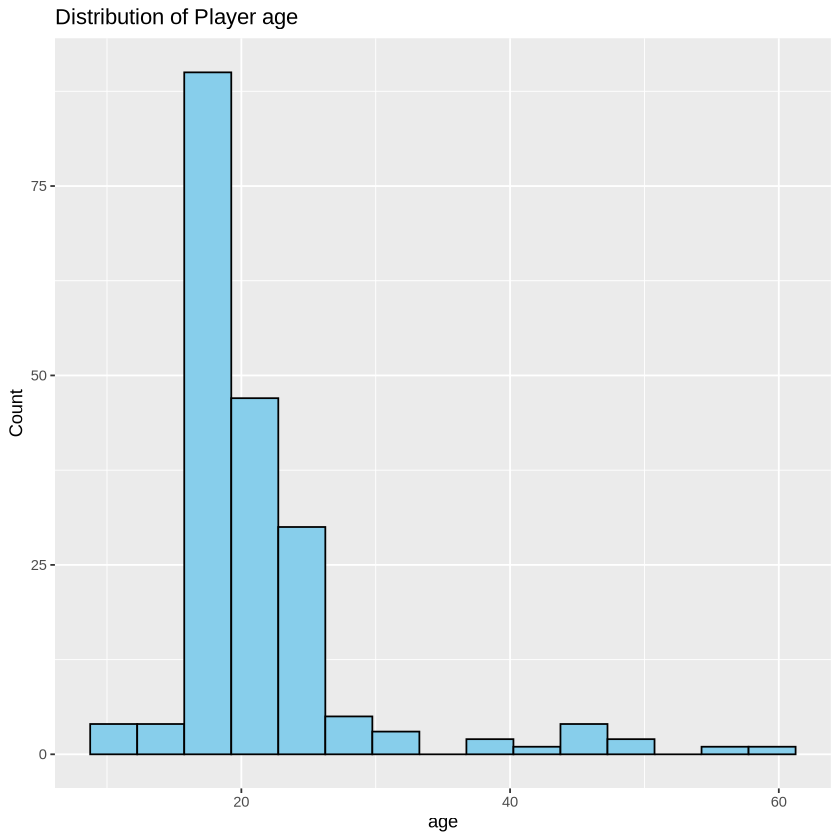

In [3]:
#4) visualization
#a) age
ggplot(players, aes(x = age)) +
    geom_histogram(bins = 15, fill = "skyblue", color = "black") +
    labs(title = "Distribution of Player age", x = "age", y="Count")

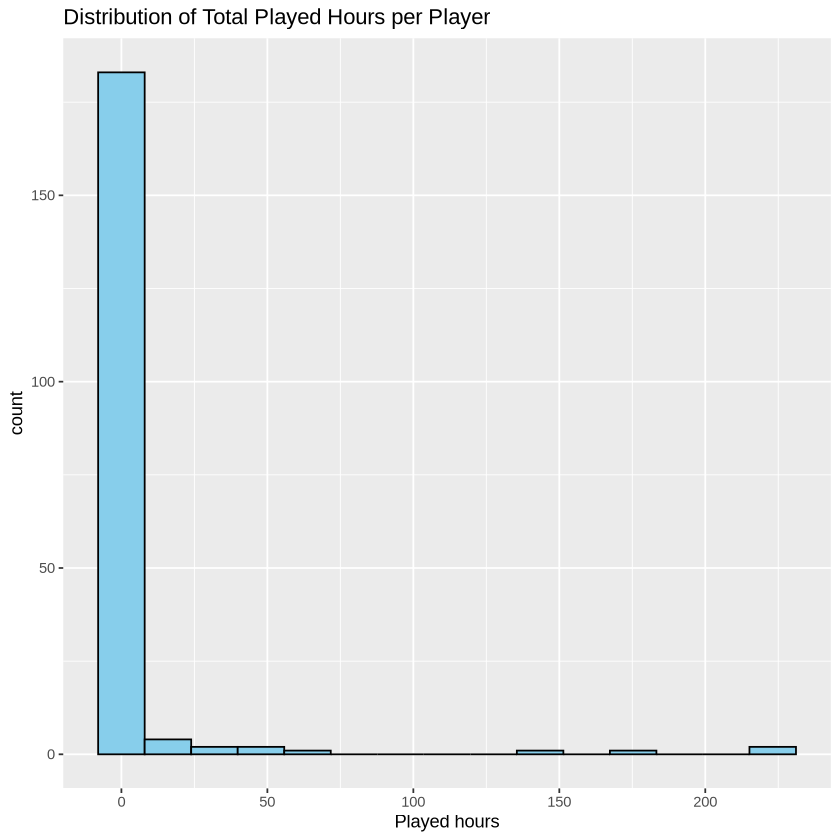

In [4]:
#b) play hours
ggplot(players, aes(x = played_hours)) +
    geom_histogram(bins = 15, fill = "skyblue", color = "black") +
    labs(title = "Distribution of Total Played Hours per Player", x = "Played hours", u = "Count")

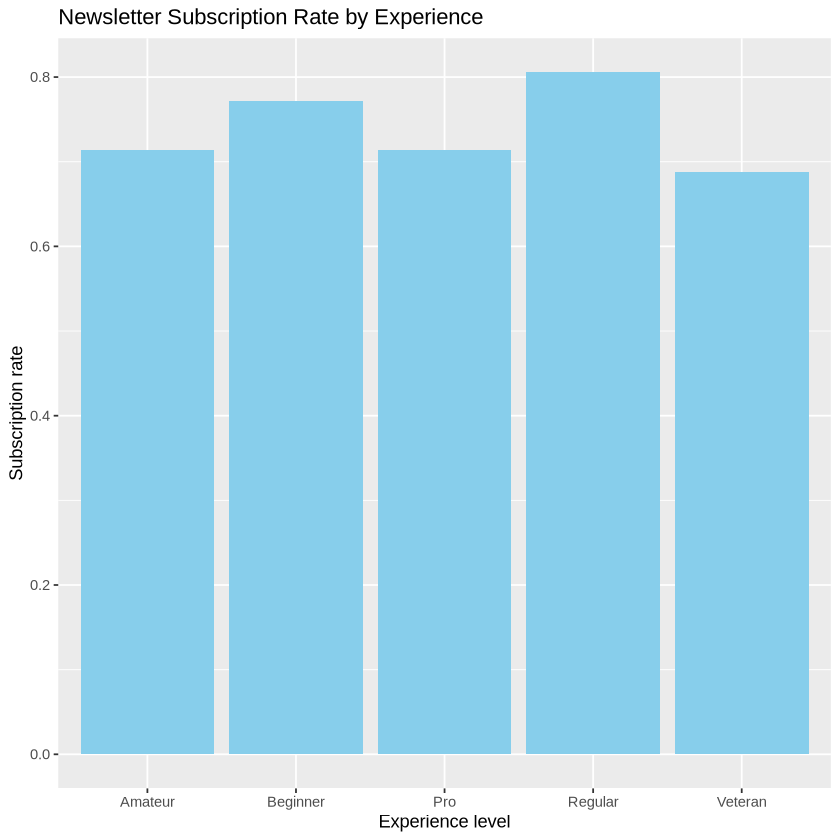

In [5]:
#c) subscribe rate in different experiences
sub_rate <- players |>
    group_by(experience) |>
    summarize(subscription_rate = mean(subscribe, na.rm = TRUE))
ggplot(sub_rate, aes(x = experience, y = subscription_rate)) +
    geom_col(fill = "skyblue") +
    labs(title = "Newsletter Subscription Rate by Experience",
       x = "Experience level", y = "Subscription rate")

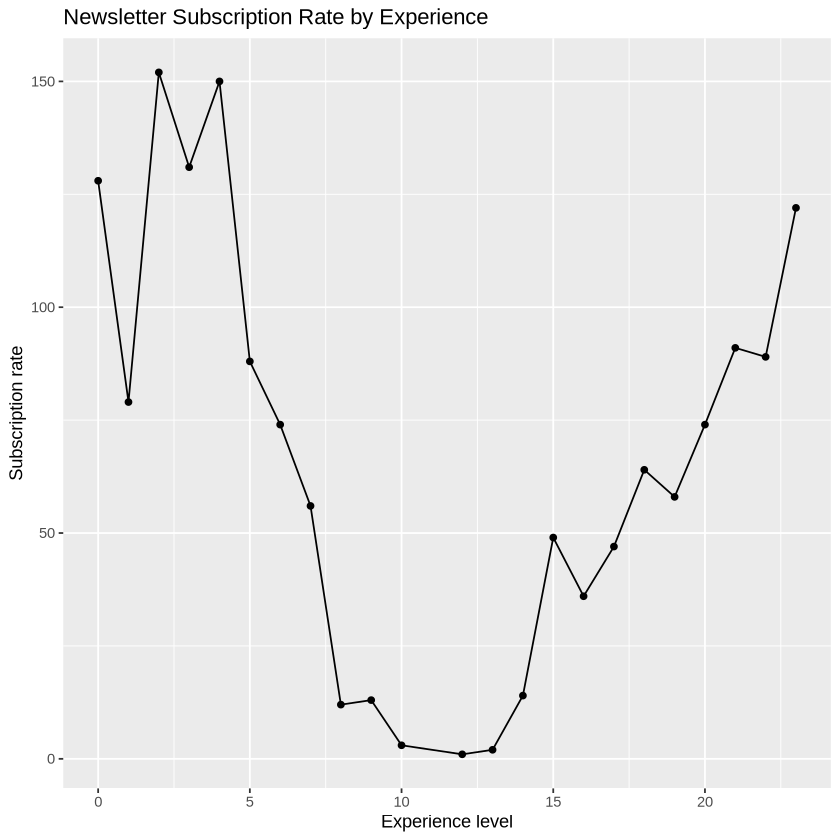

In [7]:
#d) session times
sessions_hour <- sessions |> count(start_hour)
ggplot(sessions_hour, aes(x = start_hour, y = n)) +
    geom_line() + geom_point() +
    labs(title = "Newsletter Subscription Rate by Experience",
         x = "Experience level", y = "Subscription rate")

Explanation:

Age: Most players are between the ages of 15 to 25.
Play hours: Most players have short play hours; a few true fans have long play hours.

Subscription: The players who have more experience (Regular/Pro/Veteran) usually have a higher subscription rate.

Time: The session starts more actively in the evening (for example, from 8 p.m. to 10 p.m.), which is conducive to making subsequent peak demand predictions.

### (4) Methods and Plan

To answer my question, I plan to use logistic regression. My response variable "subscribe" is binary (TRUE or FALSE), which makes logistic regression a proper choice for modeling binary outcomes. Logistic regression could estimate the newsletter subscription rate of players by analyzing the characteristics like experience and play hours.

The main assumption is that observations are independent, and the relationship between the prediction variable and the outcome variable is linear.

The limitation of this method is that it cannot find a non-linear mode and is sensitive to outliers.

I'll choose the model by checking how well it performs on validation data and comparing it with a simple baseline model.

I'll split the data into 80% training data and 20% test data. I'll also use cross-validation to prove the stabilization and generalizes of the model.

### （5） GitHub Repository



https://github.com/csrkm1345/dsci100_project